In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Load data into a Pandas dataframe
df = pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
print(df.isnull().sum())


id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [9]:
# drop the 'column_to_drop' column
df = df.drop(columns=['rbc','wc','rc'],axis=1)

<AxesSubplot:>

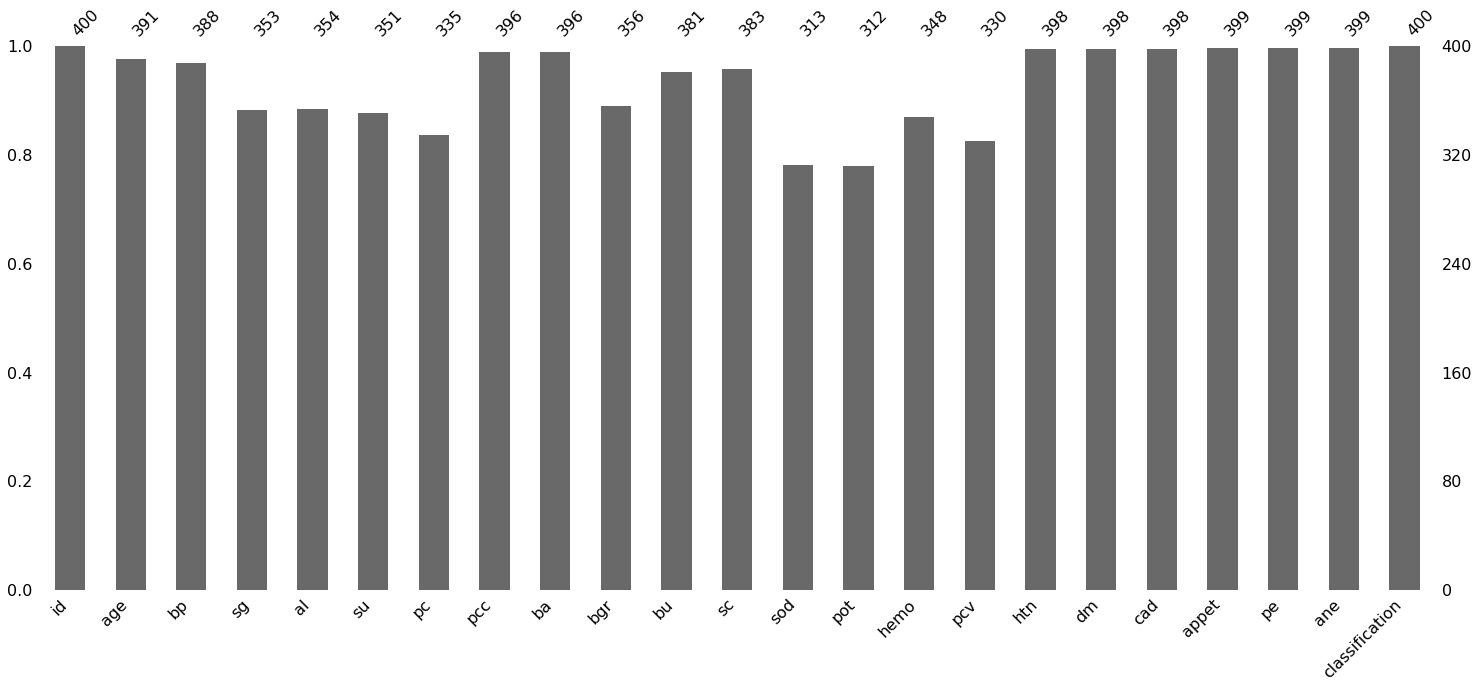

In [10]:
# Gives a bar chart of the missing values
import missingno as msno
msno.bar(df)

In [11]:
df.shape

(400, 23)

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df.describe() # 5 point sumary 

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


<AxesSubplot:>

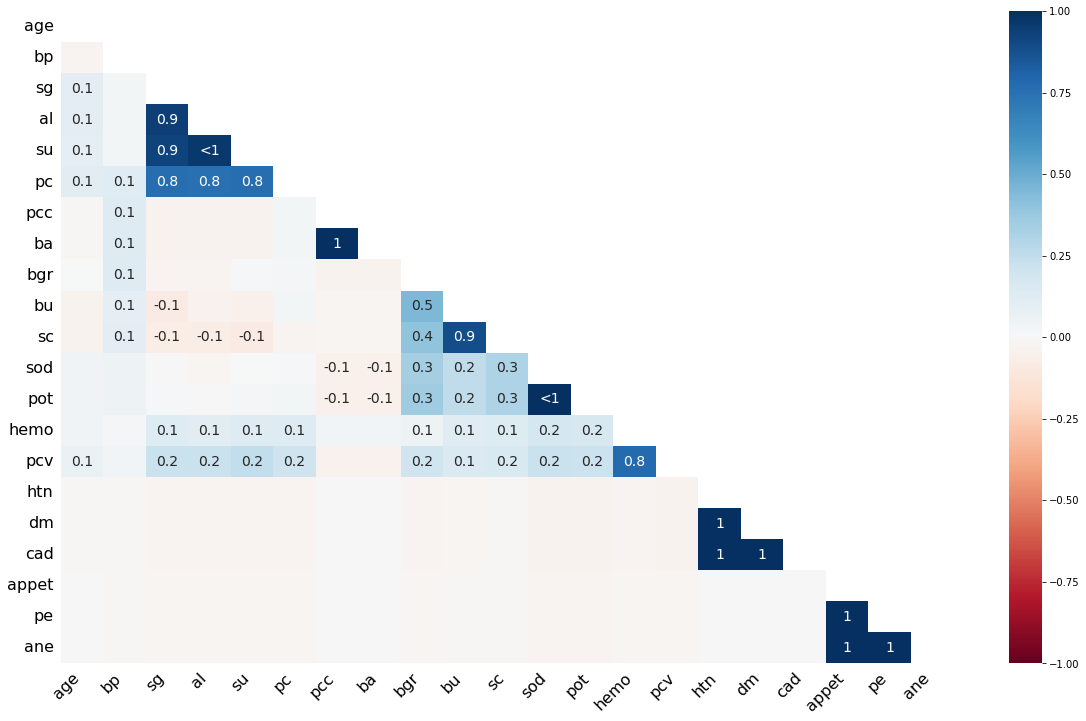

In [14]:
# Gives a heatmap of how missing values are related
msno.heatmap(df)

In [ ]:
# df.dropna(inplace=True)
# print(df)

      id   age    bp     sg   al   su        pc         pcc          ba  \
3      3  48.0  70.0  1.005  4.0  0.0  abnormal     present  notpresent   
6      6  68.0  70.0  1.010  0.0  0.0    normal  notpresent  notpresent   
9      9  53.0  90.0  1.020  2.0  0.0  abnormal     present  notpresent   
11    11  63.0  70.0  1.010  3.0  0.0  abnormal     present  notpresent   
12    12  68.0  70.0  1.015  3.0  1.0    normal     present  notpresent   
..   ...   ...   ...    ...  ...  ...       ...         ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0    normal  notpresent  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0    normal  notpresent  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0    normal  notpresent  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0    normal  notpresent  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0    normal  notpresent  notpresent   

       bgr  ...  pot  hemo  pcv  htn   dm  cad appet   pe  ane classification  
3    117.0  ...  2.

In [16]:
# Identify columns with missing values
missing_cols = df.columns[df.isna().any()].tolist()

# Fill missing values with mode
for col in missing_cols:
    mode = df[col].mode()[0]  # Compute mode
    df[col].fillna(mode, inplace=True)  # Fill missing values with mode

In [17]:
df

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,...,3.5,15.4,44,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,99.0,...,3.5,11.3,38,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,...,3.5,9.6,31,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,...,2.5,11.2,32,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,...,3.5,11.6,35,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,140.0,...,4.9,15.7,47,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,...,3.5,16.5,54,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,100.0,...,4.4,15.8,49,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,...,4.9,14.2,51,no,no,no,good,no,no,notckd


In [ ]:
print(df.isnull().sum())


id                0
age               0
bp                0
sg                0
al                0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


In [ ]:
encoder=OrdinalEncoder()

In [ ]:
# Encode categorical variables using OrdinalEncoder
#df['rbc'] = encoder.fit_transform(df[['rbc']])
df['classification'] = encoder.fit_transform(df[['classification']])
df['ane'] = encoder.fit_transform(df[['ane']])
df['pe'] = encoder.fit_transform(df[['pe']])
df['appet'] = encoder.fit_transform(df[['appet']])
df['cad'] = encoder.fit_transform(df[['cad']])
df['dm'] = encoder.fit_transform(df[['dm']])
df['htn'] = encoder.fit_transform(df[['htn']])
df['ba'] = encoder.fit_transform(df[['ba']])
df['pcc'] = encoder.fit_transform(df[['pcc']])
df['pc'] = encoder.fit_transform(df[['pc']])

In [ ]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 3 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              209 non-null    int64  
 1   age             209 non-null    float64
 2   bp              209 non-null    float64
 3   sg              209 non-null    float64
 4   al              209 non-null    float64
 5   su              209 non-null    float64
 6   pc              209 non-null    float64
 7   pcc             209 non-null    float64
 8   ba              209 non-null    float64
 9   bgr             209 non-null    float64
 10  bu              209 non-null    float64
 11  sc              209 non-null    float64
 12  sod             209 non-null    float64
 13  pot             209 non-null    float64
 14  hemo            209 non-null    float64
 15  pcv             209 non-null    object 
 16  htn             209 non-null    float64
 17  dm              209 non-null    flo

In [ ]:
# convert the 'column_to_convert' column from object to float
df['pcv'] = df['pcv'].astype(float)

<AxesSubplot:>

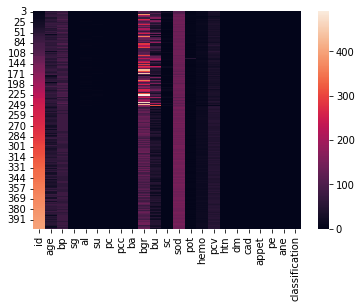

In [ ]:
import seaborn as sns
sns.heatmap(df)

In [ ]:
df.head(10)

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,0.0,117.0,...,2.5,11.2,32.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
6,6,68.0,70.0,1.010,0.0,0.0,1.0,0.0,0.0,100.0,...,4.0,12.4,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,53.0,90.0,1.020,2.0,0.0,0.0,1.0,0.0,70.0,...,3.7,9.5,29.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
11,11,63.0,70.0,1.010,3.0,0.0,0.0,1.0,0.0,380.0,...,4.2,10.8,32.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
12,12,68.0,70.0,1.015,3.0,1.0,1.0,1.0,0.0,208.0,...,5.8,9.7,28.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
14,14,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,157.0,...,6.4,5.6,16.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
15,15,40.0,80.0,1.015,3.0,0.0,1.0,0.0,0.0,76.0,...,4.9,7.6,24.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18,18,60.0,100.0,1.025,0.0,3.0,1.0,0.0,0.0,263.0,...,4.3,12.7,37.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
20,20,61.0,80.0,1.015,2.0,0.0,0.0,0.0,0.0,173.0,...,5.2,7.7,24.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
22,22,48.0,80.0,1.025,4.0,0.0,0.0,0.0,0.0,95.0,...,3.8,9.8,32.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.tail(10)

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
390,390,52.0,80.0,1.025,0.0,0.0,1.0,0.0,0.0,99.0,...,3.7,15.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
391,391,36.0,80.0,1.025,0.0,0.0,1.0,0.0,0.0,85.0,...,4.1,15.6,44.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
392,392,57.0,80.0,1.020,0.0,0.0,1.0,0.0,0.0,133.0,...,4.3,14.8,46.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
393,393,43.0,60.0,1.025,0.0,0.0,1.0,0.0,0.0,117.0,...,4.4,13.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
394,394,50.0,80.0,1.020,0.0,0.0,1.0,0.0,0.0,137.0,...,5.0,14.1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
395,395,55.0,80.0,1.020,0.0,0.0,1.0,0.0,0.0,140.0,...,4.9,15.7,47.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,396,42.0,70.0,1.025,0.0,0.0,1.0,0.0,0.0,75.0,...,3.5,16.5,54.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,397,12.0,80.0,1.020,0.0,0.0,1.0,0.0,0.0,100.0,...,4.4,15.8,49.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,398,17.0,60.0,1.025,0.0,0.0,1.0,0.0,0.0,114.0,...,4.9,14.2,51.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
399,399,58.0,80.0,1.025,0.0,0.0,1.0,0.0,0.0,131.0,...,3.5,15.8,53.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


[0.14802702 0.00383727 0.0075724  0.10438375 0.10198962 0.01289073
 0.05543613 0.00521874 0.0041581  0.01171165 0.00710201 0.04542406
 0.00826376 0.00261909 0.07629689 0.06876865 0.16815552 0.12089413
 0.00389183 0.01834413 0.01392308 0.01109144]


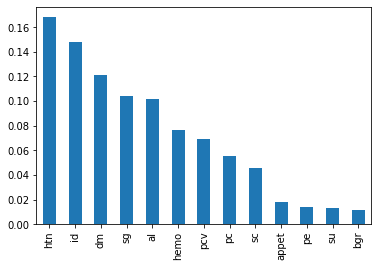

In [ ]:
import matplotlib.pyplot as plt
X=df.iloc[:,:-1]
Y=df['classification']
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot.bar()
plt.show()
list1=feat_importances.keys().to_list()

In [ ]:
# Load libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X=df.iloc[:,:-1]
y=df['classification']


# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 2)
X_kbest_features = chi2_features.fit_transform(X, y)

# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])
# print(X_kbest_features)


Original feature number: 22
Reduced feature number: 2


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Separate the features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Apply chi-square test to select the 10 most important features
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)

# Summarize scores
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns = ['Feature', 'Score']
print(feature_scores.nlargest(25,'Score'))

   Feature        Score
0       id  8647.494458
10      bu  2175.534888
9      bgr  1985.930934
11      sc   292.120260
15     pcv   265.766797
4       al   241.186813
1      age   123.057252
5       su    95.956044
14    hemo    83.062796
16     htn    82.989011
17      dm    72.615385
19   appet    41.494505
20      pe    40.197802
2       bp    39.335912
21     ane    32.417582
7      pcc    28.527473
12     sod    22.196928
18     cad    22.043956
8       ba    16.857143
6       pc    11.601681
13     pot     3.722726
3       sg     0.004021
